# Bonus Exercise

<div class="alert alert-warning">
<h3>Objective:</h3>

The following tasks are aimed to help you gain deeper insight when implementing an A/B test. The insight gained from this exercise will help you understand the role of sample size in the result of an A/B test.
 
</div>

Consider a scenario where you have two variants A and B with the following specifications:

- Variant A has the conversion rate of 0.2
- Variant B has the conversion rate of 0.25
- Both variants have a $\beta(100,100)$ as their conversion rate prior


<div class="alert alert-info">
<h4>Task 1</h4>

Your task is to investigate how increasing the sample size affects the results of the A/B test. In particular, you need to investigate the following:

1. Vary the sample size and investigate how the uplift changes. 
2. Repeat this for a strong prior e.g. $\beta(1000,1000)$ instead of $\beta(100,100)$

</div>

<div class="alert alert-success">

Hints: 

- Create a for-loop and vary the sample size according to this list: [20, 50, 100, 200, 500, 1000] 
- For simplicity, you can assume that the sample size is the same for both variants.
- Let the conversion rates remain constant while varying the sample size.
- Plot the uplift distribution vs the sample size and discuss your findings.
- Repeat the above steps for a strong prior e.g. $\beta(1000,1000)$ instead of $\beta(100,100)$

Solution:

In [1]:
# Load libraries
import matplotlib.pyplot as plt
import arviz as az

%run -i tools_solution.py

In [2]:
trace_weak_all = sample_size_effect(sample_sizes   = [20, 50, 100, 200, 500, 1000], 
                                    prior          = [100, 100], 
                                    successes_rate = [0.2, 0.25])

trace_strong_all = sample_size_effect(sample_sizes   = [20, 50, 100, 200, 500, 1000], 
                                      prior          = [1000, 1000], 
                                      successes_rate = [0.2, 0.25])

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]
Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 24 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]
Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 23 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]
Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 24 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]
Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 25 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS

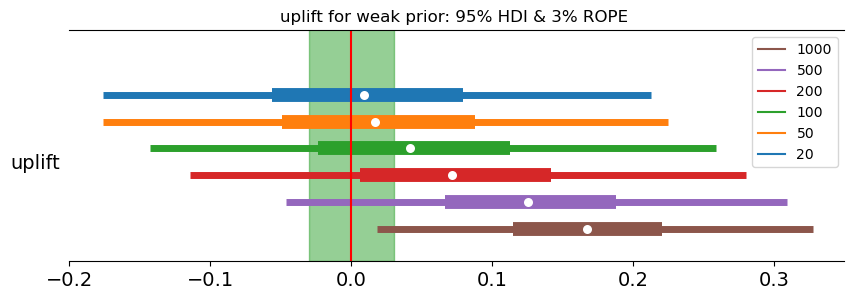

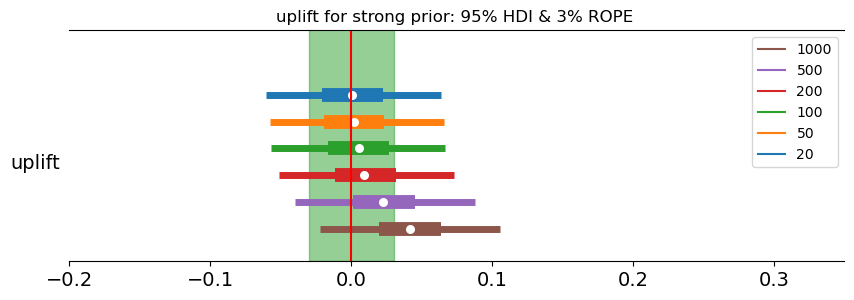

In [28]:
sample_sizes   = [20, 50, 100, 200, 500, 1000]

ax=az.plot_forest(
                [trace_weak_all[i] for i in sample_sizes],
                model_names=['20', '50', '100', '200', '500', '1000'],
                var_names=["uplift"],
                combined=True,
                hdi_prob=0.95,
                rope=[-0.03, 0.03],
                figsize=(10, 3),
                markersize=10,
                linewidth=5,
                   )
plt.axvline(x=0, color="red");
ax[0].set_title("uplift for weak prior: 95% HDI & 3% ROPE ")
ax[0].set_xlim(-0.2,0.35)

ax=az.plot_forest(
                [trace_strong_all[i] for i in sample_sizes],
                model_names=['20', '50', '100', '200', '500', '1000'],
                var_names=["uplift"],
                combined=True,
                hdi_prob=0.95,
                rope=[-0.03, 0.03],
                figsize=(10, 3),
                markersize=10,
                linewidth=5,
                   )
plt.axvline(x=0, color="red");
ax[0].set_title("uplift for strong prior: 95% HDI & 3% ROPE ")
ax[0].set_xlim(-0.2,0.35)

#plt.tight_layout()
plt.show()

What do we know from the probelem statement?
- Variant A has the conversion rate of 0.2
- Variant B has the conversion rate of 0.25
- So data indicates that variant B is better than variant A.
- weak prior: in this case we have a weak belief that the conversion rate is 0.5. So we expect that by increasing the sample size, the impact of data becomes dominant and we accept B as the better variant.
- strong prior: in this case we have a strong belief that the conversion rate is 0.5. So we expect that large sample are required to change our belief and accept B as the better variant.

Observations:

- general trend: the uplift distribution of weak prior is more spread out than the strong prior. This is because the weak prior is less informative (high uncertainty) than the strong prior. however, when sample size increase, the uplift distribution of weak prior becomes narrower (data adds information, hence less uncertainty).

- weak prior: the HDI for the uplift includes zero for sample sizes of 20 to 100. Since then the HDI indicates that B is better than A.
- strong prior: the HDI for the uplift of strong prior includes zero for sample size up to almost 500, i.e. A and B are alike. It takes a lot of sample to change our belief that B is better than A.

Note: You can also argue based on ROPE.

In general, one way to to decide about the sample size is to look at the HDI of the uplift. If the HDI is narrow enough, then we have are certain about the uplift, or the uplift is precise. If the HDI is wide, then we are uncertain about the uplift, or the uplift is not precise. So we can decide about the sample size based on the precision of the uplift.

<div class="alert alert-info">
<h4>Task 2</h4>

Perform A/B/C test on the data and try to find the best variant.

</div>

Solution:

The following example and the provided code should help you to perform A/B/C test and interpret the results. The code is partially based on the PyMC example on [A/B testing](https://www.pymc.io/projects/examples/en/latest/case_studies/bayesian_ab_testing_introduction.html).

In [12]:
trace =  get_posterior_abc(priors    = [1000, 1000],           # let the priors be the same for all variants
                            trials   = [30000, 30000, 30000],  # let the number of visitors be the same for all variants
                            successes= [5000, 10000, 15000],   # let the number of sign ups be different
                            variants = ["A", "B", "C"])        # let the variants be A, B, C

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]
Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 26 seconds.


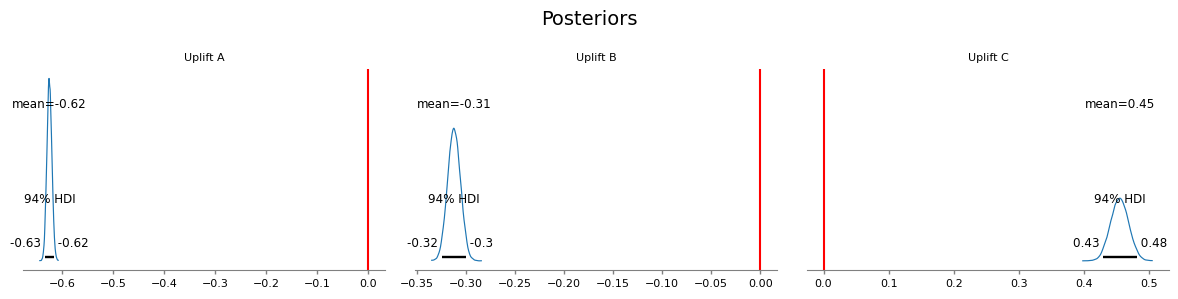

In [13]:
# plot all the three uplifts 
fig, axes = plt.subplots(1,3, figsize=(12,3), sharey=True)
fig.suptitle("Posteriors", fontsize=14)

variants = ["A", "B", "C"]

for i, var in enumerate(variants):
    az.plot_posterior(trace.posterior[f"uplift_{i}"], ax=axes[i], textsize=8)
    axes[i].axvline(x=0, color="red")
    axes[i].set_title(f"Uplift {var}", fontsize=8)

plt.tight_layout()
plt.show()

- **Variant A with conversion rate ~16%**: the posterior uplift values are all negative. So it is very unlikely that variant A is better than variant B or C.

- **Variant B with conversion rate ~33%**: assuming that A is the worst variant, then the posterior distribution shows the uplift of B relative to C. The values are all negative, hence B is worse than C.

- **Variant C with conversion rate 50%**: again, assuming that A is the worst variant, then the posterior distribution shows the uplift of C relative to B. The values are all positive, hence C is better than B.